# Base de dados:

## Breast Cancer Wisconsin (Diagnostic)


### Dados relativos a diagnóstico de câncer de mama de Wisconsin.

### variáveis ​características dos núcleos celulares presentes na imagem (entradas) e diagnostico (saídas)

### Wolberg, W., Mangasarian, O., Street, N., & Street, W. (1993). Breast Cancer Wisconsin (Diagnostic) [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5DW2B.

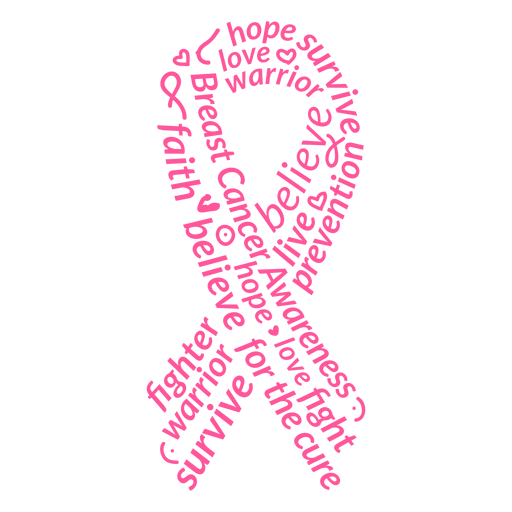

# Detalhes da base

### Número de identificação

### Diagnóstico (M = maligno, B = benigno)

### São calculadas dez caraterísticas de valor real para cada núcleo de célula:

    radius – raio médio dos núcleos
    
    texture – desvio padrão dos valores de intensidade cinza
    
    perimeter – perímetro
    
    area – área
    
    smoothness – variação local nos comprimentos de raio
    
    compactness – (perímetro² / área - 1.0)
    
    concavity – severidade das concavidades do contorno
    
    concave points – número de pontos côncavos
    
    symmetry – simetria
    
    fractal dimension – "rugosidade" das fronteiras

Para cada uma dessas 10 features, foram computadas 3 estatísticas:

    mean – média
    
    se – erro padrão
    
    worst – valor mais extremo observado

totalizando 10 × 3 = 30 colunas.

In [ ]:
pip install ucimlrepo

: 

In [ ]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import pandas as pd

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets
# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# Combinar os dados em um único DataFrame
df = pd.concat([X, y], axis=1)

df

In [ ]:
df["Diagnosis"].unique()

In [ ]:
df['Diagnosis'] = df['Diagnosis'].map({'B': 0, 'M': 1})

df

# A

## Verificando se há outliers nas features

In [ ]:
# Selecionar todas as colunas menos a última (assumindo que é 'Diagnosis')
features = df.columns[:-1]

# Função para contar outliers via IQR
def count_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return ((series < lower) | (series > upper)).sum()  #soma os valores tr de outliers


outliers = df[features].apply(count_outliers)

print(outliers)


# # Dividir o dataframe por classe
# df_benigno = df[df['Diagnosis'] == 0]
# df_maligno = df[df['Diagnosis'] == 1]
# # Aplicar a função em cada grupo
# outliers_benigno = df_benigno[features].apply(count_outliers)
# outliers_maligno = df_maligno[features].apply(count_outliers)
# # Criar um DataFrame com os dois resultados lado a lado
# df_outliers = pd.DataFrame({
#     'Outliers_Benigno': outliers_benigno,
#     'Outliers_Maligno': outliers_maligno
# })
# print(df_outliers)



## Boxplot das duas Features

In [ ]:
from scipy.stats import kurtosis, skew, mode

def analisar_features_com_boxplot(df, features):
    # Criar a figura
    plt.figure(figsize=(12, 5))
    
    # Dicionário para guardar as estatísticas
    estatisticas = {}
    
    # Plotar um boxplot para cada feature
    for i, feature in enumerate(features):
        plt.subplot(1, 2, i + 1)
        sns.boxplot(y=feature, data=df)
        plt.title(f'Boxplot de {feature}')
        plt.xlabel('Diagnóstico (Benigno(0) + Maligno(1))')
        plt.ylabel(feature)
    
        # Calcular estatísticas
        df_feature = df[feature].dropna()
        media = df_feature.mean()
        desvio = df_feature.std()
        cv = desvio / media if media != 0 else float('nan')
        curtose = kurtosis(df_feature)
        assimetria = skew(df_feature)
        moda = mode(df_feature, keepdims=False).mode  # evita erro de forma
    
        estatisticas[feature] = {
            'CV': cv,
            'Curtose': curtose,
            'Skewness': assimetria,
            'Média': media,
            'Moda': moda
        }
    
    plt.tight_layout()
    plt.show()
    
    # Exibir as estatísticas
    return pd.DataFrame(estatisticas).T


features = ['texture3', 'concave_points3']
estatisticas_df = analisar_features_com_boxplot(df, features)
print(estatisticas_df)



## Introduzindo Outliers na feature

In [ ]:
# Cópia do DataFrame original
df_outlier = df.copy()

# Calcular limites para definir outliers
q1 = df['concave_points3'].quantile(0.25)
q3 = df['concave_points3'].quantile(0.75)
iqr = q3 - q1
limite_superior = q3 + 1.5 * iqr

# Gerar 10 valores outliers (exageradamente altos)
np.random.seed(42)
outlier_vals = np.random.uniform(limite_superior * 2, limite_superior * 5, size=10)

# Criar 10 novas linhas com outliers apenas em 'concave_points3'
# Outras colunas podem ser preenchidas com NaN ou valores neutros
novas_linhas = pd.DataFrame({
    col: [np.nan]*10 for col in df.columns
})
novas_linhas['concave_points3'] = outlier_vals
novas_linhas['Diagnosis'] = -1  # valor fictício para distinguir essas linhas, se quiser

# Adicionar ao DataFrame original
df_outlier = pd.concat([df_outlier, novas_linhas], ignore_index=True)

features = ['concave_points3']
estatisticas_df = analisar_features_com_boxplot(df_outlier, features)
print(estatisticas_df)

# B

In [ ]:
# Dados de exemplo aproximados dos pontos
mouse_weight = np.array([0.8, 1.5, 3.2, 5, 6,    2.2, 4.2, 5.0, 5.5])
mouse_size = np.array([1.4, 2.4, 3.6, 5.1, 5.9,   1, 3.1, 2.7, 4])

plt.figure(figsize=(8,6))

# Scatter plot dos pontos
plt.scatter(mouse_weight, mouse_size, color='brown', s=70)

# Linha de regressão (equação dada)
y_line = 0.1 + 0.78 * mouse_weight #equação da reta fornecida
plt.plot(mouse_weight, y_line, color='black', linewidth=2)

# Eixos
plt.xlabel('Mouse weight', fontsize=12)
plt.ylabel('Mouse size', fontsize=12)

plt.xticks(np.arange(0, 7, 1))
plt.yticks(np.arange(0, 7, 1))

plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm


# Ajuste com scikit-learn
X = mouse_weight.reshape(-1, 1) #transfrma em matriz de 1 coluna e 9 linhas para o sklearn
y = mouse_size

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
slope = model.coef_[0]
intercept = model.intercept_

# Calcula o R-squared
r_squared = r2_score(y, y_pred)

print(f"Reta: y = {slope:.2f}x + {intercept:.2f}")
print(f"R-squared: {r_squared:.2f}")

# Ajuste com statsmodels para obter estatísticas completas
X_sm = sm.add_constant(X)  # adiciona a constante (intercepto)
ols_model = sm.OLS(y, X_sm).fit()
print("\nResumo do modelo (statsmodels):")
print(ols_model.summary())

# Gráfico
plt.figure(figsize=(8, 6))

# Scatter plot dos pontos
plt.scatter(X, y, color='brown', s=70, label='Dados')

# Linha da regressão do scikit-learn
plt.plot(X, model.predict(X), color='blue', linewidth=2, label='Regressão (sklearn)')


# Eixos
plt.xlabel('Mouse weight', fontsize=12)
plt.ylabel('Mouse size', fontsize=12)
plt.xticks(np.arange(0, 7, 1))
plt.yticks(np.arange(0, 7, 1))
plt.legend()
plt.title('Regressão Linear: Mouse Weight vs Size')
plt.grid(True)
plt.show()
